In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'D:\Project\project_structure\project-structure-ewb\data\raw\easyview.csv')
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [3]:
df.shape

(25480, 12)

In [4]:
df.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'yr_of_estab',
       'region_of_employment', 'prevailing_wage', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [5]:
df.drop(columns='case_id',inplace=True)

In [6]:
df.shape

(25480, 11)

In [7]:
from datetime import date

In [8]:
current_year = date.today().year
current_year

2024

In [9]:
df['company_age'] = current_year - df['yr_of_estab']
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,company_age
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied,17
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified,22
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied,16
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied,127
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified,19


In [10]:
df.drop(columns='yr_of_estab',inplace=True)

In [11]:
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 3


In [12]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 8


In [13]:
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))

Num of Discrete Features : 0


In [14]:
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Continuous Features : 3


In [15]:
X = df.drop('case_status', axis=1)
y = df['case_status']

In [16]:
X.shape, y.shape

((25480, 10), (25480,))

In [17]:
X[num_features].skew()

no_of_employees    12.265260
prevailing_wage     0.755776
company_age         2.037301
dtype: float64

In [18]:
X

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,17
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,22
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,16
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,127
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,19
...,...,...,...,...,...,...,...,...,...,...
25475,Asia,Bachelor's,Y,Y,2601,South,77092.5700,Year,Y,16
25476,Asia,High School,Y,N,3274,Northeast,279174.7900,Year,Y,18
25477,Asia,Master's,Y,N,1121,South,146298.8500,Year,N,114
25478,Asia,Master's,Y,Y,1918,West,86154.7700,Year,Y,137


In [19]:
from sklearn.preprocessing import LabelEncoder  

In [20]:
le = LabelEncoder()

In [21]:
y = le.fit_transform(y)
y

array([1, 0, 1, ..., 0, 0, 0])

In [22]:
pd.Series(y).value_counts()

0    17018
1     8462
Name: count, dtype: int64

In [23]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, PowerTransformer, FunctionTransformer, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [24]:
X_new = X.copy()

In [25]:
X_new.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,company_age
0,Asia,High School,N,N,14513,West,592.2029,Hour,Y,17
1,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,22
2,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,16
3,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,127
4,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,19


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y , test_size=0.3, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((17836, 10), (7644, 10), (17836,), (7644,))

In [28]:
pd.Series(y_train).value_counts()

0    11913
1     5923
Name: count, dtype: int64

In [29]:
pd.Series(y_test).value_counts()

0    5105
1    2539
Name: count, dtype: int64

In [30]:
ss = StandardScaler()
ohe = OneHotEncoder(sparse_output=False,drop='first')

yeo_johnson = PowerTransformer(method='yeo-johnson')
box_cox = PowerTransformer(method='box-cox')
sqrt_tranform = FunctionTransformer(np.sqrt)

In [31]:
# Create Column Transformer with 3 types of transformers

ordinal_cols = ['education_of_employee','has_job_experience','requires_job_training','full_time_position']

ohe_cols = ['continent','region_of_employment','unit_of_wage']

yeo_cols = ['no_of_employees']

box_cox_cols = ['company_age']

sqrt_cols = ['prevailing_wage']

### one_hot_encoding starts

In [32]:
X_train[ohe_cols]

,continent,region_of_employment,unit_of_wage
15468,Asia,Northeast,Year
6342,Asia,West,Hour
12679,Asia,South,Year
2052,Europe,West,Year
25240,Europe,South,Year
...,...,...,...
1112,Asia,West,Year
15807,Asia,South,Year
15689,Asia,Northeast,Year
14917,Asia,Northeast,Hour


In [33]:
for i in X_train[ohe_cols].columns:
    print(X_train[ohe_cols][i].value_counts())

continent
Asia             11783
Europe            2588
North America     2319
South America      615
Africa             402
Oceania            129
Name: count, dtype: int64
region_of_employment
Northeast    4997
South        4960
West         4603
Midwest      3015
Island        261
Name: count, dtype: int64
unit_of_wage
Year     16070
Hour      1516
Week       191
Month       59
Name: count, dtype: int64


In [34]:
X_train_trf = ohe.fit_transform(X_train[ohe_cols])
X_train_trf

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [35]:
X_train_trf.shape

(17836, 12)

In [36]:
X_test_trf = ohe.transform(X_test[ohe_cols])
X_test_trf

array([[1., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 1.]])

In [37]:
X_test_trf.shape

(7644, 12)

In [38]:
ohe.get_feature_names_out()

array(['continent_Asia', 'continent_Europe', 'continent_North America',
       'continent_Oceania', 'continent_South America',
       'region_of_employment_Midwest', 'region_of_employment_Northeast',
       'region_of_employment_South', 'region_of_employment_West',
       'unit_of_wage_Month', 'unit_of_wage_Week', 'unit_of_wage_Year'],
      dtype=object)

In [39]:
X_train_trf = pd.DataFrame(X_train_trf,columns=ohe.get_feature_names_out())
X_train_trf

,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
17831,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
17832,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
17833,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17834,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [40]:
X_test_trf = pd.DataFrame(X_test_trf,columns=ohe.get_feature_names_out())
X_test_trf

,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7639,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7640,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7641,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7642,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [41]:
X_train.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,company_age
15468,Asia,High School,Y,N,4657,Northeast,46100.4300,Year,N,20
6342,Asia,High School,N,N,2315,West,743.7198,Hour,Y,14
12679,Asia,Bachelor's,Y,N,4698,South,71967.8600,Year,Y,39
2052,Europe,Master's,Y,Y,110,West,150159.1900,Year,Y,20
25240,Europe,Bachelor's,N,Y,72173,South,85135.2700,Year,Y,105


In [42]:
type(X_train)

pandas.core.frame.DataFrame

In [43]:
X_train.drop(columns=ohe_cols,inplace=True)
X_train.reset_index(drop=True, inplace=True)
X_test.drop(columns=ohe_cols,inplace=True)
X_test.reset_index(drop=True, inplace=True)


In [44]:

X_train_trf.reset_index(drop=True, inplace=True)
X_test_trf.reset_index(drop=True, inplace=True)

In [45]:
X_train.shape, X_train_trf.shape

((17836, 7), (17836, 12))

In [46]:
X_test.shape, X_test_trf.shape

((7644, 7), (7644, 12))

In [47]:
X_train.head()

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,company_age
0,High School,Y,N,4657,46100.4300,N,20
1,High School,N,N,2315,743.7198,Y,14
2,Bachelor's,Y,N,4698,71967.8600,Y,39
3,Master's,Y,Y,110,150159.1900,Y,20
4,Bachelor's,N,Y,72173,85135.2700,Y,105


In [48]:
X_train_trf.head()

,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [49]:
X_train = pd.concat([X_train, X_train_trf],axis=1)
X_train

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,company_age,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,High School,Y,N,4657,46100.4300,N,20,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,High School,N,N,2315,743.7198,Y,14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,Bachelor's,Y,N,4698,71967.8600,Y,39,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,Master's,Y,Y,110,150159.1900,Y,20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,Bachelor's,N,Y,72173,85135.2700,Y,105,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17831,Bachelor's,Y,N,274,91273.4400,Y,145,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
17832,High School,Y,N,1721,37829.9700,Y,17,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
17833,High School,N,N,177,66197.6100,Y,80,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17834,Master's,N,N,2613,16.7318,Y,11,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [50]:
X_test.head()

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,company_age
0,Doctorate,Y,N,122114,114288.6100,Y,25
1,Bachelor's,Y,N,1855,54959.8000,Y,11
2,High School,N,Y,1194,850.9943,Y,186
3,Master's,Y,N,1475,33687.1400,N,30
4,Bachelor's,Y,N,3560,221735.9000,Y,11


In [51]:
X_test_trf.head()

,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [52]:
X_test.shape, X_test_trf.shape

((7644, 7), (7644, 12))

In [53]:
X_test = pd.concat([X_test, X_test_trf],axis=1)
X_test

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,company_age,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,Doctorate,Y,N,122114,114288.6100,Y,25,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,Bachelor's,Y,N,1855,54959.8000,Y,11,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,High School,N,Y,1194,850.9943,Y,186,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Master's,Y,N,1475,33687.1400,N,30,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,Bachelor's,Y,N,3560,221735.9000,Y,11,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7639,Master's,N,N,3403,9277.6400,N,20,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7640,Bachelor's,N,N,3956,58380.4300,Y,20,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7641,Bachelor's,Y,N,4540,51269.5800,Y,39,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7642,Bachelor's,Y,N,1537,116210.8900,Y,19,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### ordinal encoding starts here

In [54]:
ordinal_cols

['education_of_employee',
 'has_job_experience',
 'requires_job_training',
 'full_time_position']

In [55]:
education_order = ['High School',"Bachelor's","Master's",'Doctorate']
experience_order = ['N','Y']
job_training_order = ['Y','N']
position_order = ['N','Y']

In [56]:
ordinal_encode = OrdinalEncoder(categories=[education_order,experience_order,job_training_order,position_order]
                                ,handle_unknown='use_encoded_value', unknown_value=-1)

In [57]:
X_train_trf = ordinal_encode.fit_transform(X_train[ordinal_cols])
X_train.loc[:,ordinal_cols] = X_train_trf
X_train.head()

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,company_age,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,0.0,1.0,1.0,4657,46100.4300,0.0,20,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,2315,743.7198,1.0,14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,4698,71967.8600,1.0,39,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2.0,1.0,0.0,110,150159.1900,1.0,20,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,72173,85135.2700,1.0,105,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [58]:
X_test_trf = ordinal_encode.transform(X_test[ordinal_cols])
X_test.loc[:,ordinal_cols] = X_test_trf
X_test.head()

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,company_age,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,3.0,1.0,1.0,122114,114288.6100,1.0,25,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,1855,54959.8000,1.0,11,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1194,850.9943,1.0,186,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,1.0,1.0,1475,33687.1400,0.0,30,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,1.0,3560,221735.9000,1.0,11,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [59]:
X_train.shape, X_train_trf.shape

((17836, 19), (17836, 4))

In [60]:
X_test.shape, X_test_trf.shape

((7644, 19), (7644, 4))

In [61]:
ordinal_encode.get_feature_names_out()

array(['education_of_employee', 'has_job_experience',
       'requires_job_training', 'full_time_position'], dtype=object)

### yeo_johnson and box_starts

In [62]:
yeo_cols = ['no_of_employees']

box_cox_cols = ['company_age']

In [63]:
X_train[yeo_cols]

,no_of_employees
0,4657
1,2315
2,4698
3,110
4,72173
...,...
17831,274
17832,1721
17833,177
17834,2613


In [64]:
X_train[yeo_cols].describe()

,no_of_employees
count,17836.000000
mean,5675.376486
std,22630.380810
min,-26.000000
25%,1012.750000
50%,2098.000000
75%,3504.000000
max,602069.000000


In [65]:
X_train[X_train['no_of_employees']<0]

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,company_age,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
856,1.0,1.0,1.0,-26,5247.3200,1.0,101,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1020,3.0,1.0,1.0,-14,37012.8000,1.0,35,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1380,0.0,0.0,1.0,-11,44640.6000,1.0,55,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1889,2.0,0.0,1.0,-25,39452.9900,1.0,44,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2750,3.0,1.0,1.0,-11,25753.5100,1.0,40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3403,1.0,0.0,1.0,-14,29325.8500,1.0,12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5313,2.0,1.0,1.0,-11,95072.7500,1.0,24,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
5682,0.0,0.0,1.0,-14,58488.5000,1.0,24,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5806,1.0,0.0,1.0,-14,24641.6100,1.0,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6490,3.0,0.0,1.0,-25,141435.9500,1.0,26,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [66]:
X_train.shape, X_train[X_train['no_of_employees']<0].shape

((17836, 19), (24, 19))

In [67]:
X_train[X_train['no_of_employees']==12]

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,company_age,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
13642,1.0,0.0,1.0,12,148920.43,1.0,16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [68]:
X_train[X_train['no_of_employees']>10]['no_of_employees'].min()

12

In [69]:
X[X['no_of_employees']<0].index

Index([  245,   378,   832,  2918,  6439,  6634,  7224,  7281,  7318,  7761,
        9872, 11493, 13471, 14022, 14146, 14726, 15600, 15859, 16157, 16883,
       17006, 17655, 17844, 17983, 20815, 20984, 21255, 21760, 21944, 22084,
       22388, 23186, 23476],
      dtype='int64')

In [70]:
y[X[X['no_of_employees']<0].index]

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1])

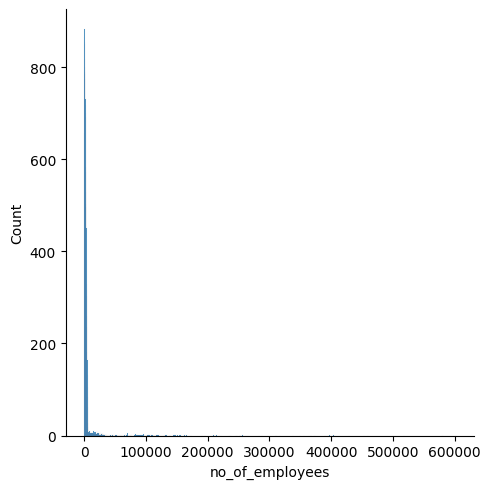

In [71]:
sns.displot(X_train['no_of_employees'])

In [72]:
X_train['no_of_employees'].describe()

count     17836.000000
mean       5675.376486
std       22630.380810
min         -26.000000
25%        1012.750000
50%        2098.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64

In [73]:
X_train.shape

(17836, 19)

In [74]:
neg_xtrain = X_train[X_train['no_of_employees']<10].index.values
neg_xtrain

array([  856,  1020,  1380,  1889,  2750,  3403,  5313,  5682,  5806,
        6490,  7013,  7343,  9823,  9890, 10938, 11356, 12114, 13298,
       13751, 14228, 14454, 16892, 16936, 17201], dtype=int64)

In [75]:
neg_xtest = X_test[X_test['no_of_employees']<10].index.values
neg_xtest

array([ 821, 1588, 1876, 3053, 3276, 4118, 4382, 4805, 7633], dtype=int64)

In [76]:
X_train[X_train['no_of_employees']>10]['no_of_employees'].median()

2100.5

In [77]:
X_test[X_test['no_of_employees']>10]['no_of_employees'].median()

2136.0

In [78]:
X_train.iloc[neg_xtrain,3] = X_train[X_train['no_of_employees']>10]['no_of_employees'].median()

In [79]:
X_test.iloc[neg_xtest,3] = X_test[X_test['no_of_employees']>10]['no_of_employees'].median()

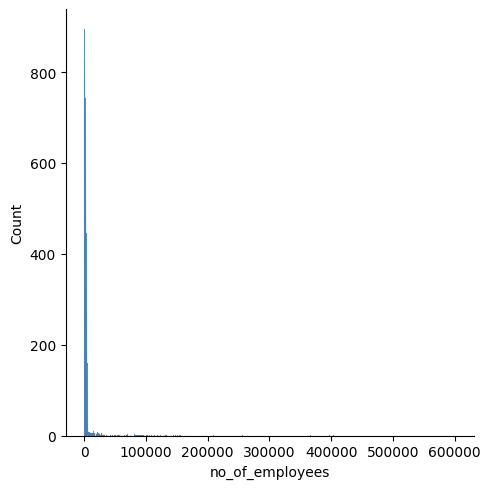

In [80]:
sns.displot(X_train['no_of_employees'])

In [81]:
X_train['no_of_employees'].describe()

count     17836.000000
mean       5678.227125
std       22629.796851
min          12.000000
25%        1020.000000
50%        2100.500000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64

In [82]:
X_train['no_of_employees'].skew()

12.212452812683027

### Box-Cox implementation

In [83]:
yeo_cols = ['no_of_employees']

box_cox_cols = ['company_age']

In [84]:
X_train[yeo_cols]

,no_of_employees
0,4657.0
1,2315.0
2,4698.0
3,110.0
4,72173.0
...,...
17831,274.0
17832,1721.0
17833,177.0
17834,2613.0


In [85]:
X_train[box_cox_cols].describe()

,company_age
count,17836.000000
mean,44.582025
std,42.257412
min,8.000000
25%,19.000000
50%,27.000000
75%,48.000000
max,224.000000


In [86]:
box_cox_cols = ['no_of_employees', 'company_age']

In [87]:
X_train[box_cox_cols]

,no_of_employees,company_age
0,4657.0,20
1,2315.0,14
2,4698.0,39
3,110.0,20
4,72173.0,105
...,...,...
17831,274.0,145
17832,1721.0,17
17833,177.0,80
17834,2613.0,11


In [88]:
box_cox = PowerTransformer(method='box-cox')
sqrt_tranform = FunctionTransformer(np.sqrt)

In [89]:
X_train_trf = box_cox.fit_transform(X_train[box_cox_cols])
X_train_trf

array([[ 0.73281176, -0.63620831],
       [ 0.18128616, -1.3631101 ],
       [ 0.73967036,  0.42554037],
       ...,
       [-1.92792091,  1.23885034],
       [ 0.27748929, -1.93190322],
       [ 0.6654011 ,  1.70078747]])

In [90]:
X_train.loc[:,box_cox_cols] = X_train_trf
X_train

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,company_age,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,0.0,1.0,1.0,0.732812,46100.4300,0.0,-0.636208,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.181286,743.7198,1.0,-1.363110,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.739670,71967.8600,1.0,0.425540,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2.0,1.0,0.0,-2.332445,150159.1900,1.0,-0.636208,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,2.809305,85135.2700,1.0,1.479169,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17831,1.0,1.0,1.0,-1.560301,91273.4400,1.0,1.725740,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
17832,0.0,1.0,1.0,-0.055450,37829.9700,1.0,-0.951684,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
17833,0.0,0.0,1.0,-1.927921,66197.6100,1.0,1.238850,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17834,2.0,0.0,1.0,0.277489,16.7318,1.0,-1.931903,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [91]:
X_test_trf = box_cox.transform(X_test[box_cox_cols])
X_test.loc[:,box_cox_cols] = X_test_trf

In [92]:
X_test

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,company_age,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,3.0,1.0,1.0,3.192542,114288.6100,1.0,-0.242089,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,0.004572,54959.8000,1.0,-1.931903,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,-0.349653,850.9943,1.0,1.890982,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,1.0,1.0,-0.179266,33687.1400,0.0,0.049370,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,1.0,0.521941,221735.9000,1.0,-1.931903,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7639,2.0,0.0,1.0,0.486402,9277.6400,0.0,-0.636208,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7640,1.0,0.0,1.0,0.604902,58380.4300,1.0,-0.636208,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7641,1.0,1.0,1.0,0.712894,51269.5800,1.0,0.425540,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7642,1.0,1.0,1.0,-0.146170,116210.8900,1.0,-0.733072,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### square root transform

In [93]:
X_train['prevailing_wage'].describe()

count     17836.000000
mean      74451.906208
std       52948.357619
min           2.136700
25%       34004.732500
50%       70334.755000
75%      107609.827500
max      315497.600000
Name: prevailing_wage, dtype: float64

In [94]:
X_train['prevailing_wage'].skew()

0.7618767215871516

<Axes: xlabel='prevailing_wage', ylabel='Density'>

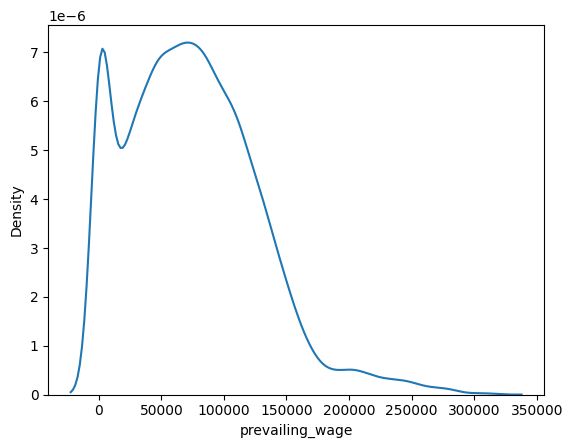

In [95]:
sns.kdeplot(X_train['prevailing_wage'])

In [96]:
sqrt_transformer = FunctionTransformer(func=np.sqrt, validate=True)

In [97]:
X_train.loc[:,'prevailing_wage'] = sqrt_transformer.transform(X_train[['prevailing_wage']])
X_train

c:\Users\Asus\.conda\envs\testenv\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,company_age,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,0.0,1.0,1.0,0.732812,214.710107,0.0,-0.636208,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.181286,27.271227,1.0,-1.363110,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.739670,268.268261,1.0,0.425540,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2.0,1.0,0.0,-2.332445,387.503794,1.0,-0.636208,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,2.809305,291.779489,1.0,1.479169,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17831,1.0,1.0,1.0,-1.560301,302.114945,1.0,1.725740,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
17832,0.0,1.0,1.0,-0.055450,194.499280,1.0,-0.951684,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
17833,0.0,0.0,1.0,-1.927921,257.288962,1.0,1.238850,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17834,2.0,0.0,1.0,0.277489,4.090452,1.0,-1.931903,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [98]:
X_test.loc[:,'prevailing_wage'] = sqrt_transformer.transform(X_test[['prevailing_wage']])
X_test

c:\Users\Asus\.conda\envs\testenv\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,company_age,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,3.0,1.0,1.0,3.192542,338.065985,1.0,-0.242089,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,0.004572,234.435066,1.0,-1.931903,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,-0.349653,29.171807,1.0,1.890982,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,1.0,1.0,-0.179266,183.540568,0.0,0.049370,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,1.0,0.521941,470.888416,1.0,-1.931903,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7639,2.0,0.0,1.0,0.486402,96.320507,0.0,-0.636208,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7640,1.0,0.0,1.0,0.604902,241.620425,1.0,-0.636208,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7641,1.0,1.0,1.0,0.712894,226.427869,1.0,0.425540,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7642,1.0,1.0,1.0,-0.146170,340.897184,1.0,-0.733072,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [99]:
X_train

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,company_age,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,0.0,1.0,1.0,0.732812,214.710107,0.0,-0.636208,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.181286,27.271227,1.0,-1.363110,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.739670,268.268261,1.0,0.425540,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,2.0,1.0,0.0,-2.332445,387.503794,1.0,-0.636208,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,2.809305,291.779489,1.0,1.479169,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17831,1.0,1.0,1.0,-1.560301,302.114945,1.0,1.725740,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
17832,0.0,1.0,1.0,-0.055450,194.499280,1.0,-0.951684,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
17833,0.0,0.0,1.0,-1.927921,257.288962,1.0,1.238850,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
17834,2.0,0.0,1.0,0.277489,4.090452,1.0,-1.931903,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [100]:
X_test

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,company_age,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,3.0,1.0,1.0,3.192542,338.065985,1.0,-0.242089,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,0.004572,234.435066,1.0,-1.931903,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,-0.349653,29.171807,1.0,1.890982,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,1.0,1.0,-0.179266,183.540568,0.0,0.049370,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,1.0,1.0,0.521941,470.888416,1.0,-1.931903,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7639,2.0,0.0,1.0,0.486402,96.320507,0.0,-0.636208,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7640,1.0,0.0,1.0,0.604902,241.620425,1.0,-0.636208,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
7641,1.0,1.0,1.0,0.712894,226.427869,1.0,0.425540,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
7642,1.0,1.0,1.0,-0.146170,340.897184,1.0,-0.733072,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled,columns=scaler.get_feature_names_out())

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=scaler.get_feature_names_out())

In [102]:
scaler.get_feature_names_out()

array(['education_of_employee', 'has_job_experience',
       'requires_job_training', 'no_of_employees', 'prevailing_wage',
       'full_time_position', 'company_age', 'continent_Asia',
       'continent_Europe', 'continent_North America', 'continent_Oceania',
       'continent_South America', 'region_of_employment_Midwest',
       'region_of_employment_Northeast', 'region_of_employment_South',
       'region_of_employment_West', 'unit_of_wage_Month',
       'unit_of_wage_Week', 'unit_of_wage_Year'], dtype=object)

In [104]:
X_train_scaled

,education_of_employee,has_job_experience,requires_job_training,no_of_employees,prevailing_wage,full_time_position,company_age,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year
0,-1.710703,0.849679,0.364818,0.732812,-0.298384,-2.895243,-0.636208,0.716733,-0.411980,-0.386586,-0.085354,-0.188977,-0.451029,1.602917,-0.620655,-0.589782,-0.05761,-0.104041,0.331503
1,-1.710703,-1.176915,0.364818,0.181286,-1.958443,0.345394,-1.363110,0.716733,-0.411980,-0.386586,-0.085354,-0.188977,-0.451029,-0.623863,-0.620655,1.695542,-0.05761,-0.104041,-3.016564
2,-0.498895,0.849679,0.364818,0.739670,0.175956,0.345394,0.425540,0.716733,-0.411980,-0.386586,-0.085354,-0.188977,-0.451029,-0.623863,1.611201,-0.589782,-0.05761,-0.104041,0.331503
3,0.712912,0.849679,-2.741095,-2.332445,1.231969,0.345394,-0.636208,-1.395220,2.427305,-0.386586,-0.085354,-0.188977,-0.451029,-0.623863,-0.620655,1.695542,-0.05761,-0.104041,0.331503
4,-0.498895,-1.176915,-2.741095,2.809305,0.384184,0.345394,1.479169,-1.395220,2.427305,-0.386586,-0.085354,-0.188977,-0.451029,-0.623863,1.611201,-0.589782,-0.05761,-0.104041,0.331503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17831,-0.498895,0.849679,0.364818,-1.560301,0.475720,0.345394,1.725740,0.716733,-0.411980,-0.386586,-0.085354,-0.188977,-0.451029,-0.623863,-0.620655,1.695542,-0.05761,-0.104041,0.331503
17832,-1.710703,0.849679,0.364818,-0.055450,-0.477382,0.345394,-0.951684,0.716733,-0.411980,-0.386586,-0.085354,-0.188977,-0.451029,-0.623863,1.611201,-0.589782,-0.05761,-0.104041,0.331503
17833,-1.710703,-1.176915,0.364818,-1.927921,0.078717,0.345394,1.238850,0.716733,-0.411980,-0.386586,-0.085354,-0.188977,-0.451029,1.602917,-0.620655,-0.589782,-0.05761,-0.104041,0.331503
17834,0.712912,-1.176915,0.364818,0.277489,-2.163744,0.345394,-1.931903,0.716733,-0.411980,-0.386586,-0.085354,-0.188977,-0.451029,1.602917,-0.620655,-0.589782,-0.05761,-0.104041,-3.016564


<Axes: xlabel='prevailing_wage', ylabel='Density'>

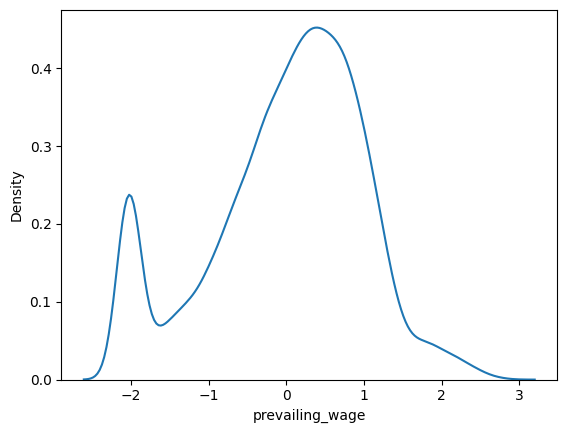

In [106]:
sns.kdeplot(X_train_scaled['prevailing_wage'])

### Model building

In [107]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [108]:
from sklearn.metrics import (accuracy_score, classification_report, ConfusionMatrixDisplay, precision_score,
                             recall_score, f1_score, roc_auc_score, roc_curve)

In [109]:
def evaluation(true, predicted):
    acc = accuracy_score(true, predicted)
    f1 = f1_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    roc_auc =   roc_auc_score(true, predicted)
    return acc , f1, precision, recall, roc_auc

In [110]:
models = {
    "LogisticRegression" : LogisticRegression(max_iter=400),
    "SVC" : SVC(),
    "KNN Classifier" : KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XG Boost Classifier" : XGBClassifier(),
    "Catboost Classifier" : CatBoostClassifier()
}

In [111]:
for i in models.values():
    print(i)

LogisticRegression(max_iter=400)
SVC()
KNeighborsClassifier()
RandomForestClassifier()
DecisionTreeClassifier()
GradientBoostingClassifier()
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [112]:
new_df =pd.DataFrame(columns=['model_train_acc' , 'model_train_f1_score', 'model_train_precision', 'model_train_recall', 
                              'model_train_roc_auc','model_test_acc' , 'model_test_f1_score', 'model_test_precision', 'model_test_recall', 'model_test_roc_auc'])

In [113]:
def evaluate_model(X_train_resampled, y_train_resampled, X_test_transformed,y_test)-> float:
    
    new_df =pd.DataFrame(columns=['model_name','model_train_acc' , 'model_train_f1_score', 'model_train_precision', 'model_train_recall', 'model_train_roc_auc',
                                  'model_test_acc' , 'model_test_f1_score', 'model_test_precision', 'model_test_recall', 'model_test_roc_auc'])
    
    for i , model in enumerate(models.values()):
        
        new_df.loc[i,'model_name'] = model
        model.fit(X_train_scaled, y_train)
        
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled) 
        
        
        # train data accuracy
        model_train_acc , model_train_f1_score, model_train_precision, model_train_recall, model_train_roc_auc = evaluation(y_train,y_train_pred)
       
        # test data accuracy
        model_test_acc , model_test_f1_score, model_test_precision, model_test_recall, model_test_roc_auc = evaluation(y_test,y_test_pred)
        
        
        
        new_df.loc[i,['model_train_acc' , 'model_train_f1_score', 'model_train_precision', 'model_train_recall', 'model_train_roc_auc']] = model_train_acc , model_train_f1_score, model_train_precision, model_train_recall, model_train_roc_auc
        new_df.loc[i,['model_test_acc' , 'model_test_f1_score', 'model_test_precision', 'model_test_recall', 'model_test_roc_auc']] = model_test_acc , model_test_f1_score, model_test_precision, model_test_recall, model_test_roc_auc
        
    return new_df

In [115]:
new_df = evaluate_model(X_train_scaled, y_train, X_test_scaled,y_test)
new_df

Learning rate set to 0.035256
0:	learn: 0.6814248	total: 146ms	remaining: 2m 26s
1:	learn: 0.6700569	total: 152ms	remaining: 1m 15s
2:	learn: 0.6597000	total: 158ms	remaining: 52.4s
3:	learn: 0.6499965	total: 163ms	remaining: 40.6s
4:	learn: 0.6406450	total: 168ms	remaining: 33.4s
5:	learn: 0.6323394	total: 173ms	remaining: 28.7s
6:	learn: 0.6241958	total: 178ms	remaining: 25.3s
7:	learn: 0.6172173	total: 184ms	remaining: 22.8s
8:	learn: 0.6100900	total: 189ms	remaining: 20.9s
9:	learn: 0.6047545	total: 194ms	remaining: 19.2s
10:	learn: 0.5998353	total: 199ms	remaining: 17.9s
11:	learn: 0.5947397	total: 205ms	remaining: 16.9s
12:	learn: 0.5902445	total: 210ms	remaining: 16s
13:	learn: 0.5860113	total: 216ms	remaining: 15.2s
14:	learn: 0.5822424	total: 222ms	remaining: 14.6s
15:	learn: 0.5800957	total: 225ms	remaining: 13.8s
16:	learn: 0.5765756	total: 231ms	remaining: 13.3s
17:	learn: 0.5729779	total: 237ms	remaining: 12.9s
18:	learn: 0.5697300	total: 243ms	remaining: 12.5s
19:	learn: 

,model_name,model_train_acc,model_train_f1_score,model_train_precision,model_train_recall,model_train_roc_auc,model_test_acc,model_test_f1_score,model_test_precision,model_test_recall,model_test_roc_auc
0,LogisticRegression(max_iter=400),0.730825,0.51244,0.642966,0.425967,0.654182,0.737572,0.525768,0.657599,0.437968,0.662275
1,SVC(),0.756448,0.586679,0.672117,0.520513,0.697132,0.751962,0.577352,0.665126,0.510043,0.691163
2,KNeighborsClassifier(),0.799058,0.670406,0.736215,0.615398,0.752885,0.706829,0.519408,0.570151,0.476959,0.649058
3,"(DecisionTreeClassifier(max_features='sqrt', r...",0.999944,0.999916,1.0,0.999831,0.999916,0.728022,0.540146,0.616044,0.480898,0.665914
4,DecisionTreeClassifier(),1.0,1.0,1.0,1.0,1.0,0.646389,0.474431,0.46851,0.480504,0.604699
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.753196,0.572953,0.673432,0.498565,0.68918,0.753794,0.574593,0.674271,0.500591,0.690158
6,"XGBClassifier(base_score=None, booster=None, c...",0.840435,0.731154,0.829938,0.653385,0.79341,0.73561,0.550989,0.632008,0.488381,0.673476
7,<catboost.core.CatBoostClassifier object at 0x...,0.792891,0.644603,0.749273,0.565592,0.735746,0.748168,0.567513,0.660565,0.49744,0.685155


### treat Imbalanced Data and train model again 

In [103]:
preprocessor = ColumnTransformer(
    transformers=[
        ('ohe_transform',ohe,ohe_cols),
        ('ordinal_trf',ordinal_encode,ordinal_cols),
        ('yeo-johnson',yeo_johnson,yeo_cols),
        ('box-cox',box_cox,box_cox_cols),
        ('square_root',sqrt_tranform,sqrt_cols),
        ('standard_scaler',StandardScaler(),yeo_cols + box_cox_cols + sqrt_cols)
    
],
    remainder='passthrough')